In [115]:
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

compare with https://www.kaggle.com/code/michalbrezk/xgboost-classifier-and-hyperparameter-tuning-85

In [116]:
df = pd.read_csv("/Users/simoneboesso/Desktop/LiverDiseaseClassification/indian_liver_patient.csv")

In [117]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [118]:
print(df.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [119]:
print(df['Albumin_and_Globulin_Ratio'].mean())
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(0.947)

0.9470639032815197


In [120]:
df = df.rename(columns={'Dataset':'Label'})

In [121]:
print(df['Label'].value_counts())

Label
1    416
2    167
Name: count, dtype: int64


In [122]:
df['Label'] = df['Label'].replace(1,0)
df['Label'] = df['Label'].replace(2,1)

In [123]:
print(df['Label'].value_counts())

Label
0    416
1    167
Name: count, dtype: int64


In [124]:
print(df.dtypes)

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Label                           int64
dtype: object


In [125]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})

## Let's visualize the distro of the columns

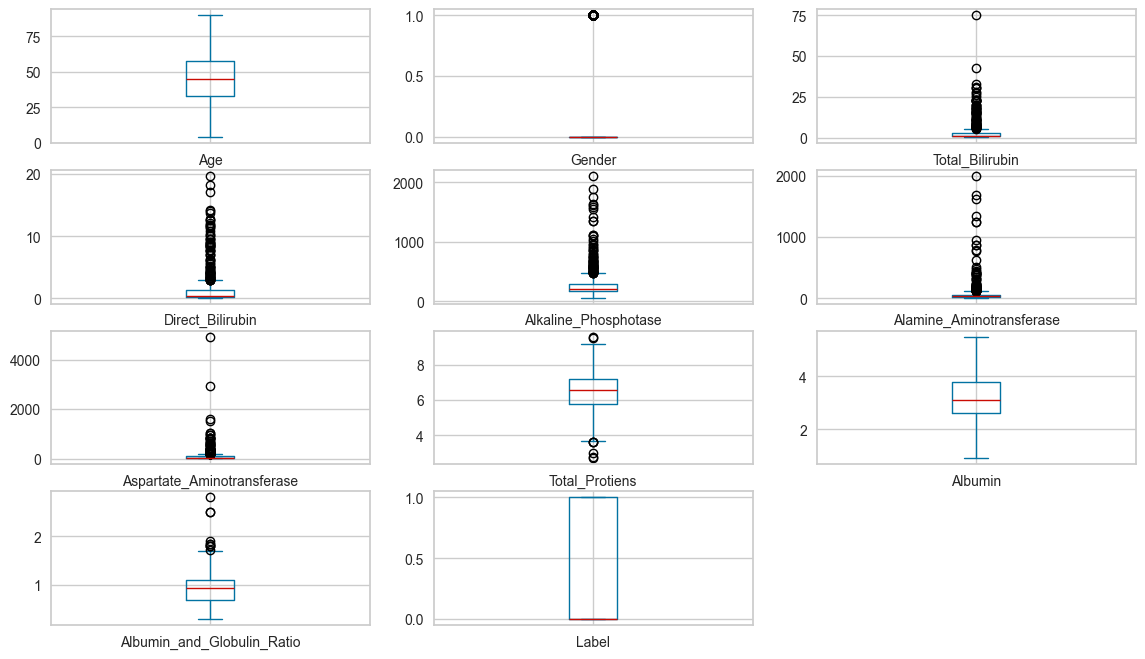

In [126]:
df.plot(kind='box',layout=(4,3),subplots=True,figsize=(14,8))
plt.show()

There are a lot of outliers!

In [127]:
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.243568,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947063,0.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947000,0.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [128]:
df = pd.get_dummies(df, columns=['Gender'])

In [129]:
df.shape

(583, 12)

In [130]:
df.to_csv("StartingPoint.csv")

In [131]:
Y = df["Label"]
X = df.drop("Label", axis=1)

In [132]:
X.columns

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Gender_0',
       'Gender_1'],
      dtype='object')

# Training 

In [133]:
COLUMNS = X.columns

In [134]:
#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

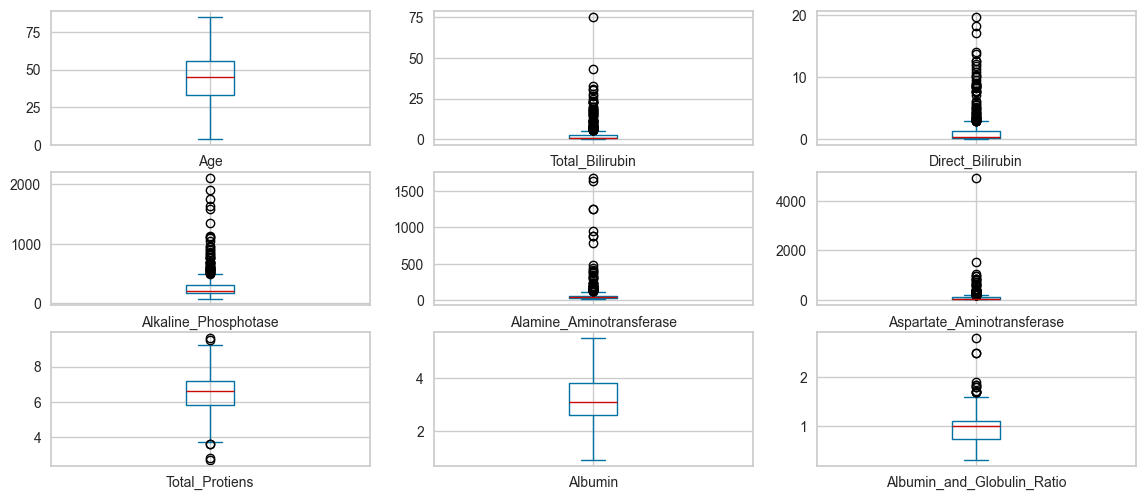

In [135]:
X_train.plot(kind='box',layout=(4,3),subplots=True,figsize=(14,8))
plt.show()

In [136]:
len(COLUMNS)

11

In [137]:
COLUMNS

Index(['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Gender_0',
       'Gender_1'],
      dtype='object')

In [138]:
# Apply log1p transformation on dataframe - just selected values
'''This function is particularly useful for data transformation, especially when dealing with data that includes zero values,
 as it efficiently computes the logarithm of 1 plus the input value, 
i.e., log(1+x)'''
Cols_withOutliers = ['Total_Bilirubin','Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase',"Albumin_and_Globulin_Ratio"]
for c in Cols_withOutliers:
    X_train[c] = np.log1p(X_train[c])

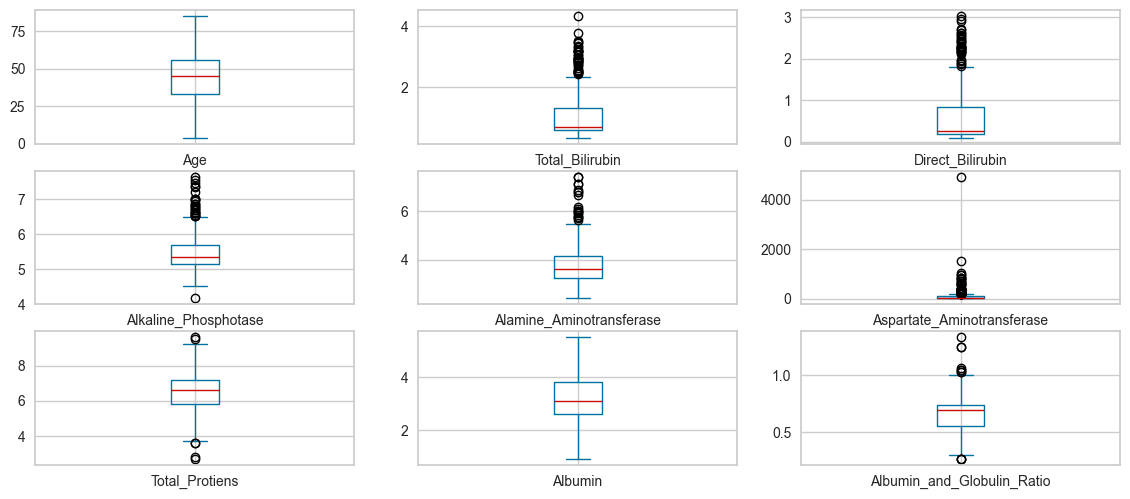

In [139]:
X_train.plot(kind='box',layout=(4,3),subplots=True,figsize=(14,8))
plt.show()

In [140]:
X_train.min()

Age                                  4
Total_Bilirubin               0.336472
Direct_Bilirubin               0.09531
Alkaline_Phosphotase          4.158883
Alamine_Aminotransferase      2.397895
Aspartate_Aminotransferase          11
Total_Protiens                     2.7
Albumin                            0.9
Albumin_and_Globulin_Ratio    0.262364
Gender_0                         False
Gender_1                         False
dtype: object

In [141]:
from sklearn.preprocessing import  RobustScaler
rs = RobustScaler()
rs.fit(X_train)
X_train = rs.transform(X_train)

Cols_withOutliers = ['Total_Bilirubin','Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase',"Albumin_and_Globulin_Ratio"]
for c in Cols_withOutliers:
    X_test[c] = np.log1p(X_test[c])
X_test = rs.transform(X_test)

In [142]:
X_train.min()

-2.7857142857142847

## First approach!

In [143]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators = 25, random_state = 42)

# Train the model on training data
model_RF.fit(X_train, y_train)

#importances = list(model_RF.feature_importances_)
features_list = list(COLUMNS)
feature_imp = pd.Series(model_RF.feature_importances_, index=features_list).sort_values(ascending=False)
print(feature_imp)


#Test prediction on testing data. 
prediction_test_RF = model_RF.predict(X_test)

Alkaline_Phosphotase          0.156881
Alamine_Aminotransferase      0.142995
Aspartate_Aminotransferase    0.130998
Age                           0.111380
Direct_Bilirubin              0.096583
Albumin                       0.094817
Total_Protiens                0.093618
Albumin_and_Globulin_Ratio    0.072851
Total_Bilirubin               0.067626
Gender_1                      0.016994
Gender_0                      0.015257
dtype: float64


In [144]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print(classification_report(y_test, prediction_test_RF))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       109
           1       0.49      0.46      0.47        37

    accuracy                           0.74       146
   macro avg       0.65      0.65      0.65       146
weighted avg       0.74      0.74      0.74       146



In [145]:
print(confusion_matrix(y_test, prediction_test_RF))

[[91 18]
 [20 17]]


In [146]:
probs = model_RF.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, probs))

0.7790726506322837


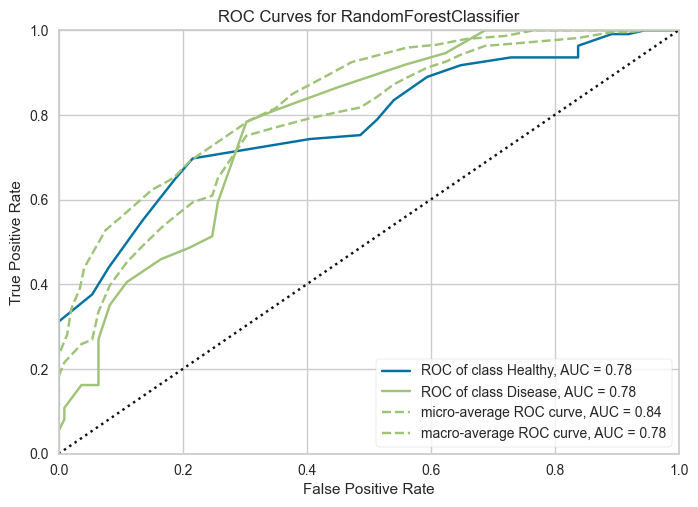

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [147]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

#https://www.scikit-yb.org/en/latest/api/classifier/rocauc.html
from yellowbrick.classifier import ROCAUC

X_train = pd.DataFrame(X_train,columns=X.columns)
X_test = pd.DataFrame(X_test,columns=X.columns)

roc_auc=ROCAUC(model_RF, classes=["Healthy","Disease"])

roc_auc.fit(X_train, y_train)

roc_auc.score(X_test, y_test)
roc_auc.show()

# Second Approach!

### Upsampling!

In [148]:
df = pd.read_csv("StartingPoint.csv")
df = df.drop("Unnamed: 0", axis=1)

In [149]:
df["Label"].value_counts()

Label
0    416
1    167
Name: count, dtype: int64

In [150]:
Y = df["Label"]
X = df.drop("Label", axis=1)

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [152]:
X_train.min()

Age                               4
Total_Bilirubin                 0.4
Direct_Bilirubin                0.1
Alkaline_Phosphotase             63
Alamine_Aminotransferase         10
Aspartate_Aminotransferase       11
Total_Protiens                  2.7
Albumin                         0.9
Albumin_and_Globulin_Ratio      0.3
Gender_0                      False
Gender_1                      False
dtype: object

In [153]:
Cols_withOutliers = ['Total_Bilirubin','Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase',"Albumin_and_Globulin_Ratio"]
for c in Cols_withOutliers:
    X_train[c] = np.log1p(X_train[c])

rs = RobustScaler()
rs.fit(X_train)
X_train = rs.transform(X_train)

Cols_withOutliers = ['Total_Bilirubin','Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase',"Albumin_and_Globulin_Ratio"]
for c in Cols_withOutliers:
    X_test[c] = np.log1p(X_test[c])
X_test = rs.transform(X_test)

In [154]:
X_train_smote = X_train.copy()
y_train_smote = y_train

In [155]:
df = pd.DataFrame(X_train, columns=COLUMNS)
df["Label"] = y_train

df_majority = df[df['Label'] == 0]
df_minority = df[df['Label'] == 1] 

In [156]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=259,    # to match majority class
                                 random_state=42) # reproducible results
df_minority_upsampled.shape

(259, 12)

In [157]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
print(df_upsampled['Label'].value_counts())

Label
1.0    259
0.0    224
Name: count, dtype: int64


In [158]:
y_upsampled = df_upsampled["Label"].values
X_train_upsampled = df_upsampled.drop(labels = ["Label"], axis=1) 

In [159]:
#Train again with new upsamples data
model_RF_upsampled = RandomForestClassifier(n_estimators = 25, random_state = 42)

# Train the model on training data
model_RF_upsampled.fit(X_train_upsampled, y_upsampled)
prediction_test_RF_upsampled = model_RF_upsampled.predict(X_test)

In [160]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print(classification_report(y_test, prediction_test_RF_upsampled))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       109
           1       0.32      0.24      0.28        37

    accuracy                           0.68       146
   macro avg       0.54      0.53      0.53       146
weighted avg       0.65      0.68      0.66       146



In [161]:
print(confusion_matrix(y_test, prediction_test_RF_upsampled))

[[90 19]
 [28  9]]


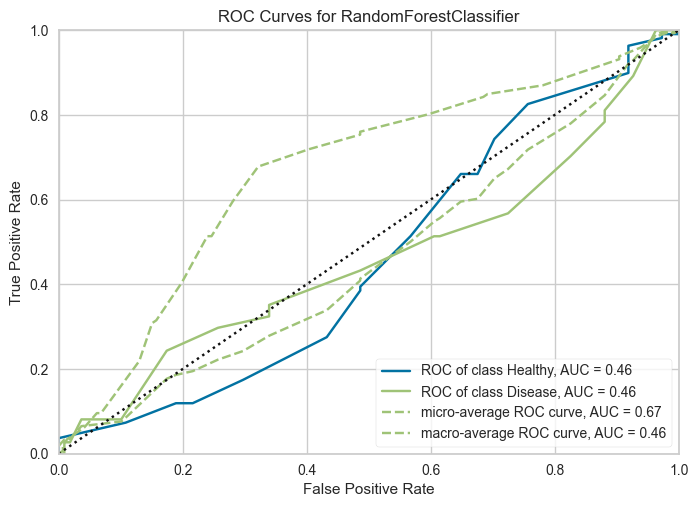

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [162]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

#https://www.scikit-yb.org/en/latest/api/classifier/rocauc.html
from yellowbrick.classifier import ROCAUC

X_train = pd.DataFrame(X_train,columns=X.columns)
X_test = pd.DataFrame(X_test,columns=X.columns)

roc_auc=ROCAUC(model_RF_upsampled, classes=["Healthy","Disease"])

roc_auc.fit(X_train_upsampled, y_upsampled)

roc_auc.score(X_test, y_test)
roc_auc.show()

# Third Approach!

In [163]:
X_train_smote.shape

(437, 11)

In [164]:
from imblearn.over_sampling import SMOTE, ADASYN

X_smote, Y_smote = SMOTE().fit_resample(X_train_smote, y_train_smote) 

In [165]:
(unique, counts) = np.unique(y_train, return_counts=True)
print("Original data: ", unique, counts)
(unique2, counts2) = np.unique(Y_smote, return_counts=True)
print("After SMOTE: ", unique2, counts2)

Original data:  [0 1] [307 130]
After SMOTE:  [0 1] [307 307]


In [170]:
model_SMOTE = RandomForestClassifier( random_state = 42)
model_SMOTE.fit(X_smote, Y_smote)
prediction_test_smote = model_SMOTE.predict(X_test)

In [171]:
print(classification_report(y_test, prediction_test_smote))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       109
           1       0.41      0.46      0.44        37

    accuracy                           0.70       146
   macro avg       0.61      0.62      0.62       146
weighted avg       0.71      0.70      0.70       146



In [172]:
print(confusion_matrix(y_test, prediction_test_smote))

[[85 24]
 [20 17]]


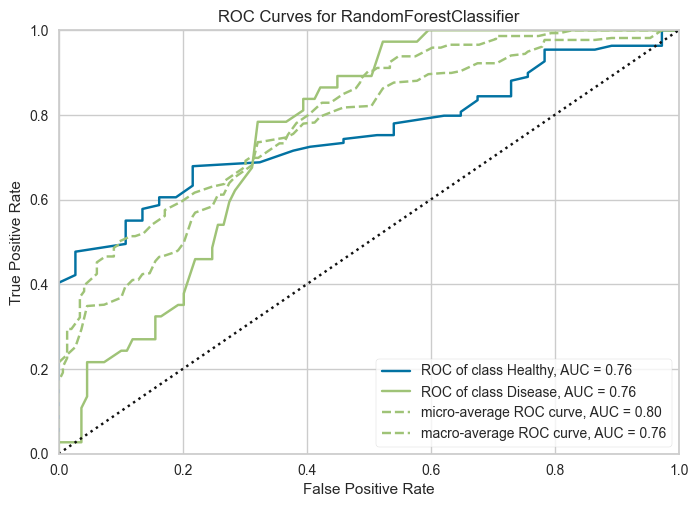

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [173]:
roc_auc=ROCAUC(model_SMOTE, classes=["Healthy","Disease"])
roc_auc.fit(X_smote, Y_smote)
roc_auc.score(X_test, y_test)
roc_auc.show()